In [2]:
#Lineaarinen regressio - yksi selittävä muuttuja
#Koneoppimisen mallit löytyvät sklearn-kirjastosta (scikit-learn). Lue lisää https://scikit-learn.org/stable/
#X1 Relative Compactness
#X2 Surface Area
#X3 Wall Area
#X4 Roof Area
#X5 Overall Height
#X6 Orientation
#X7 Glazing Area
#X8 Glazing Area Distribution
#y1 Heating Load
#y2 Cooling Load

# Tuon kirjastot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Avaan datan
df=pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


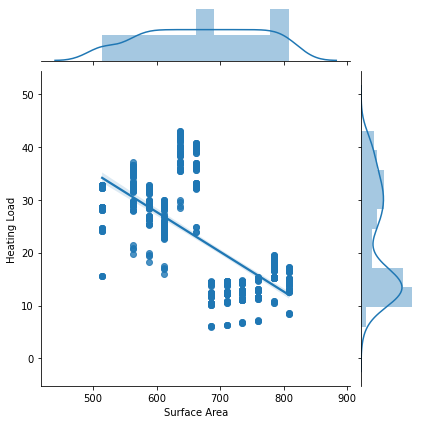

In [14]:
# Riippuvuuden tarkastelua seaborn-kirjaston jointoplot-kaavion avulla
df = df.rename(columns = {'X2': 'Surface Area', 'Y1': 'Heating Load'})
sns.jointplot(data=df, x='Surface Area', y='Heating Load', kind='reg')

In [15]:
# Valmistelen datan

X = df['Surface Area'].to_frame() # feature-matriisi X; huomaa dataframeksi muuntaminen (to_frame)

y = df['Heating Load'] # target eli selitettävä/ennustettava muuttuja

In [16]:
# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

# Sovitan mallin dataan
malli = LinearRegression().fit(X,y)

In [17]:
malli.coef_ # regressiosuoran kulmakerroin

array([-0.07538718])

In [18]:
malli.intercept_ # regressiosuoran vakiotermi

72.94539473507263

In [19]:
malli.score(X,y) # selityskerroin

0.43312182523819587

In [20]:
malli.predict(pd.DataFrame([500, 600, 700])) # ennusteet, jos x = 500, 600 tai 700

array([35.25180296, 27.7130846 , 20.17436624])

In [21]:
df

,X1,Surface Area,X3,X4,X5,X6,X7,X8,Heating Load,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61
